In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Loading data

In [2]:
df_pro_contacts_adults = pd.read_csv("pro_contacts_adults.csv", index_col=0)
df_pro_contacts_children = pd.read_csv("pro_contacts_children.csv", index_col=0)
df_households = pd.read_csv("households.csv", index_col=0)


#infos
print(df_households.sum())
#df_households.describe()
#df_pro_contacts_children.describe()
#df_pro_contacts_adults.describe()




nb_children                                                 3085
nb_adults                                                   6960
type           two_parent_familytwo_parent_familytwo_parent_f...
size                                                       10045
dtype: object


# Initializing the graph

We start by defining the classes whose instances will be the nodes of our graph

In [3]:
class Person():
    def __init__(self, person_id, state, age):
        self.person_id = person_id
        self.age = age
        self.state = state
    
    def __str__(self):
        s = "Person #{}".format(self.person_id)
        return(s)
    
    def __repr__(self):
        s = "Person #{}".format(self.person_id)
        return(s)

class Adult(Person):
    def __init__(self, person_id, state, job_cat, pro_contacts, company_id):
        super().__init__(person_id, state, "adult")
        self.job_cat = job_cat
        self.pro_contacts = pro_contacts
        self.company_id = company_id

class Child(Person):
    def __init__(self, person_id, state, school_contacts, school_id):
        super().__init__(person_id, state, "child")
        self.job_cat = job_cat
        self.school_contacts = school_contacts
        self.school_id = school_id

We create an empty graph into which we add nodes from the pro_contacts dataframes.

In [4]:
G = nx.Graph()
people = [] # we'll store Person objects here too in order to be able to access them quickly with person_id

for i, row in df_pro_contacts_adults.iterrows(): #We add adults to the nodes
    person_id = row.adult_id
    state = "S"
    job_cat = row.job_cat
    pro_contacts = row.pro_contacts
    company_id = row.company_id
    
    adult_node = Adult(person_id, state, job_cat, pro_contacts, company_id)
    G.add_node(adult_node)
    people.append(adult_node)
    
for i, row in df_pro_contacts_children.iterrows(): #We add childrens to the nodes
    person_id = row.child_id
    state = "S"
    school_contacts = row.school_contacts
    school_id = row.school_id
    
    child_node = Child(person_id, state, school_contacts, school_id)
    G.add_node(child_node)
    people.append(child_node)

    #print(G.nodes())
    


# Creating cliques for households

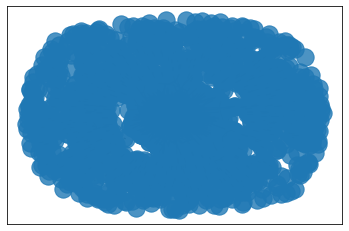

In [14]:
n_households = max(max(df_pro_contacts_children.index), max(df_pro_contacts_adults.index))
for id_household in range(n_households):
    df_household_adults = df_pro_contacts_adults.loc[df_pro_contacts_adults.index == id_household]
    household_adults = df_household_adults.adult_id
    
    df_household_children = df_pro_contacts_children.loc[df_pro_contacts_children.index == id_household]
    household_children = df_household_children.child_id
    
    household_people_ids = list(household_children) + list(household_adults)
    for edge in combinations(household_people_ids, 2):
        a = people[edge[0]]
        b = people[edge[1]]
        G.add_edge(a, b)
        G[a][b]["type"] = "household"
        G[a][b]["id"] = id_household
        



In [18]:
pos = nx.spring_layout(G, iterations=50)

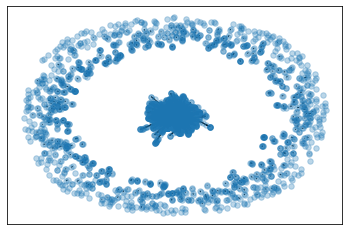

In [19]:
 
#for node in G.nodes():
    
    
    
#pos = nx.spring_layout(G, iterations=20)
nx.draw_networkx_nodes(G,pos,node_size=30 ,alpha =0.3)
nx.draw_networkx_edges(G, pos)
    

# Creating cliques for companies

In [6]:
n_companies = int(max(df_pro_contacts_adults.company_id))
for company_id in range(n_companies):
    df_company = df_pro_contacts_adults.loc[df_pro_contacts_adults.company_id == company_id]
    company_employees_ids = list(df_company.adult_id)
    
    for edge in combinations(company_employees_ids, 2):
        a = people[edge[0]]
        b = people[edge[1]]
        G.add_edge(a, b)
        G[a][b]["type"] = "company"
        G[a][b]["id"] = company_id

In [7]:
df_company

adult_id         job_cat  pro_contacts  company_id
household_id                                                    
1087              2699  Services_other          1317       250.0
1619              4024  Services_other           201       250.0
2458              5009  Services_other           714       250.0

In [22]:
pos = nx.spring_layout(G, iterations=60)

(Person #0, Person #6960)
(Person #0, Person #6961)
(Person #0, Person #1)
(Person #0, Person #11)
(Person #0, Person #23)
(Person #0, Person #29)
(Person #0, Person #36)
(Person #0, Person #60)
(Person #0, Person #116)
(Person #0, Person #208)
(Person #0, Person #295)
(Person #0, Person #329)
(Person #0, Person #407)
(Person #0, Person #421)
(Person #0, Person #427)
(Person #0, Person #512)
(Person #0, Person #536)
(Person #0, Person #684)
(Person #0, Person #713)
(Person #0, Person #864)
(Person #0, Person #914)
(Person #0, Person #941)
(Person #0, Person #989)
(Person #0, Person #1003)
(Person #0, Person #1019)
(Person #0, Person #1025)
(Person #0, Person #1026)
(Person #0, Person #1077)
(Person #0, Person #1164)
(Person #0, Person #1472)
(Person #0, Person #1487)
(Person #0, Person #1618)
(Person #0, Person #1686)
(Person #0, Person #1783)
(Person #0, Person #1825)
(Person #0, Person #1834)
(Person #0, Person #1844)
(Person #0, Person #1860)
(Person #0, Person #1861)
(Person #0, Pe

(Person #77, Person #6773)
(Person #77, Person #6942)
(Person #78, Person #79)
(Person #78, Person #331)
(Person #78, Person #499)
(Person #78, Person #715)
(Person #78, Person #727)
(Person #78, Person #965)
(Person #78, Person #1054)
(Person #78, Person #1559)
(Person #78, Person #1687)
(Person #78, Person #2091)
(Person #78, Person #2236)
(Person #78, Person #2302)
(Person #78, Person #2379)
(Person #78, Person #2386)
(Person #78, Person #2525)
(Person #78, Person #2537)
(Person #78, Person #2677)
(Person #78, Person #3046)
(Person #78, Person #3300)
(Person #78, Person #3919)
(Person #78, Person #4100)
(Person #78, Person #4169)
(Person #78, Person #4512)
(Person #78, Person #4549)
(Person #78, Person #4586)
(Person #78, Person #4627)
(Person #78, Person #4683)
(Person #78, Person #4855)
(Person #78, Person #4972)
(Person #78, Person #5062)
(Person #78, Person #5442)
(Person #78, Person #5597)
(Person #78, Person #5838)
(Person #78, Person #6022)
(Person #78, Person #6290)
(Person 

(Person #196, Person #557)
(Person #196, Person #622)
(Person #196, Person #671)
(Person #196, Person #764)
(Person #196, Person #874)
(Person #196, Person #990)
(Person #196, Person #1123)
(Person #196, Person #1378)
(Person #196, Person #1589)
(Person #196, Person #1619)
(Person #196, Person #1727)
(Person #196, Person #1888)
(Person #196, Person #2018)
(Person #196, Person #2021)
(Person #196, Person #2216)
(Person #196, Person #2647)
(Person #196, Person #2835)
(Person #196, Person #3045)
(Person #196, Person #3453)
(Person #196, Person #3626)
(Person #196, Person #3726)
(Person #196, Person #4650)
(Person #196, Person #4718)
(Person #196, Person #4807)
(Person #196, Person #5020)
(Person #196, Person #5114)
(Person #196, Person #5219)
(Person #196, Person #5332)
(Person #196, Person #5364)
(Person #196, Person #5370)
(Person #196, Person #5541)
(Person #196, Person #5723)
(Person #196, Person #6887)
(Person #197, Person #7082)
(Person #197, Person #254)
(Person #197, Person #320)


(Person #317, Person #7150)
(Person #317, Person #7151)
(Person #317, Person #7152)
(Person #317, Person #318)
(Person #317, Person #469)
(Person #317, Person #488)
(Person #317, Person #605)
(Person #317, Person #656)
(Person #317, Person #745)
(Person #317, Person #916)
(Person #317, Person #1086)
(Person #317, Person #1418)
(Person #317, Person #1430)
(Person #317, Person #1484)
(Person #317, Person #1842)
(Person #317, Person #1958)
(Person #317, Person #2303)
(Person #317, Person #2344)
(Person #317, Person #2384)
(Person #317, Person #2432)
(Person #317, Person #2458)
(Person #317, Person #2552)
(Person #317, Person #2636)
(Person #317, Person #2701)
(Person #317, Person #2833)
(Person #317, Person #3058)
(Person #317, Person #3143)
(Person #317, Person #3295)
(Person #317, Person #3445)
(Person #317, Person #3832)
(Person #317, Person #4013)
(Person #317, Person #4016)
(Person #317, Person #4081)
(Person #317, Person #4289)
(Person #317, Person #4340)
(Person #317, Person #4447)

(Person #429, Person #4236)
(Person #429, Person #4268)
(Person #429, Person #4369)
(Person #429, Person #4411)
(Person #429, Person #4465)
(Person #429, Person #4474)
(Person #429, Person #4518)
(Person #429, Person #4551)
(Person #429, Person #4561)
(Person #429, Person #4624)
(Person #429, Person #4731)
(Person #429, Person #4918)
(Person #429, Person #4930)
(Person #429, Person #5113)
(Person #429, Person #5161)
(Person #429, Person #5187)
(Person #429, Person #5392)
(Person #429, Person #5438)
(Person #429, Person #5444)
(Person #429, Person #5446)
(Person #429, Person #5486)
(Person #429, Person #5501)
(Person #429, Person #5727)
(Person #429, Person #5781)
(Person #429, Person #5834)
(Person #429, Person #5843)
(Person #429, Person #5845)
(Person #429, Person #5912)
(Person #429, Person #5946)
(Person #429, Person #5952)
(Person #429, Person #6049)
(Person #429, Person #6064)
(Person #429, Person #6073)
(Person #429, Person #6087)
(Person #429, Person #6109)
(Person #429, Person

(Person #559, Person #1005)
(Person #559, Person #1068)
(Person #559, Person #1247)
(Person #559, Person #1345)
(Person #559, Person #1385)
(Person #559, Person #1492)
(Person #559, Person #1611)
(Person #559, Person #1706)
(Person #559, Person #1747)
(Person #559, Person #1948)
(Person #559, Person #2083)
(Person #559, Person #2164)
(Person #559, Person #2167)
(Person #559, Person #2193)
(Person #559, Person #2204)
(Person #559, Person #2355)
(Person #559, Person #2569)
(Person #559, Person #2608)
(Person #559, Person #2984)
(Person #559, Person #3138)
(Person #559, Person #3148)
(Person #559, Person #3854)
(Person #559, Person #3987)
(Person #559, Person #4282)
(Person #559, Person #4297)
(Person #559, Person #4532)
(Person #559, Person #4686)
(Person #559, Person #4687)
(Person #559, Person #4938)
(Person #559, Person #4982)
(Person #559, Person #5346)
(Person #559, Person #5546)
(Person #559, Person #5550)
(Person #559, Person #5674)
(Person #559, Person #5726)
(Person #559, Person

(Person #673, Person #4699)
(Person #673, Person #5000)
(Person #673, Person #5258)
(Person #673, Person #5407)
(Person #673, Person #5571)
(Person #673, Person #5642)
(Person #673, Person #5683)
(Person #673, Person #5852)
(Person #673, Person #6205)
(Person #673, Person #6762)
(Person #674, Person #7348)
(Person #674, Person #675)
(Person #674, Person #709)
(Person #674, Person #737)
(Person #674, Person #883)
(Person #674, Person #1273)
(Person #674, Person #1302)
(Person #674, Person #1386)
(Person #674, Person #1416)
(Person #674, Person #1463)
(Person #674, Person #1465)
(Person #674, Person #1670)
(Person #674, Person #1732)
(Person #674, Person #1833)
(Person #674, Person #2296)
(Person #674, Person #2437)
(Person #674, Person #2605)
(Person #674, Person #3006)
(Person #674, Person #3155)
(Person #674, Person #3280)
(Person #674, Person #3312)
(Person #674, Person #3368)
(Person #674, Person #3525)
(Person #674, Person #3561)
(Person #674, Person #3567)
(Person #674, Person #36

(Person #804, Person #1809)
(Person #804, Person #1881)
(Person #804, Person #1943)
(Person #804, Person #2048)
(Person #804, Person #2074)
(Person #804, Person #2155)
(Person #804, Person #2278)
(Person #804, Person #2422)
(Person #804, Person #2459)
(Person #804, Person #2517)
(Person #804, Person #2523)
(Person #804, Person #2665)
(Person #804, Person #2732)
(Person #804, Person #2758)
(Person #804, Person #2885)
(Person #804, Person #2887)
(Person #804, Person #3283)
(Person #804, Person #3399)
(Person #804, Person #3517)
(Person #804, Person #4021)
(Person #804, Person #4025)
(Person #804, Person #4092)
(Person #804, Person #4134)
(Person #804, Person #4210)
(Person #804, Person #4302)
(Person #804, Person #4386)
(Person #804, Person #4556)
(Person #804, Person #4623)
(Person #804, Person #5037)
(Person #804, Person #5096)
(Person #804, Person #5103)
(Person #804, Person #5241)
(Person #804, Person #5261)
(Person #804, Person #5504)
(Person #804, Person #5620)
(Person #804, Person

(Person #917, Person #2102)
(Person #917, Person #2263)
(Person #917, Person #2397)
(Person #917, Person #2438)
(Person #917, Person #2773)
(Person #917, Person #3017)
(Person #917, Person #3020)
(Person #917, Person #3307)
(Person #917, Person #3347)
(Person #917, Person #3439)
(Person #917, Person #3590)
(Person #917, Person #3673)
(Person #917, Person #3676)
(Person #917, Person #3860)
(Person #917, Person #3959)
(Person #917, Person #4516)
(Person #917, Person #4540)
(Person #917, Person #4554)
(Person #917, Person #4675)
(Person #917, Person #4771)
(Person #917, Person #5147)
(Person #917, Person #5238)
(Person #917, Person #5336)
(Person #917, Person #5452)
(Person #917, Person #6408)
(Person #917, Person #6529)
(Person #917, Person #6619)
(Person #917, Person #6742)
(Person #917, Person #6929)
(Person #918, Person #7478)
(Person #918, Person #969)
(Person #918, Person #1343)
(Person #918, Person #1498)
(Person #918, Person #1680)
(Person #918, Person #1903)
(Person #918, Person 

(Person #1039, Person #1509)
(Person #1039, Person #1523)
(Person #1039, Person #1636)
(Person #1039, Person #1646)
(Person #1039, Person #1768)
(Person #1039, Person #1955)
(Person #1039, Person #2005)
(Person #1039, Person #2644)
(Person #1039, Person #2778)
(Person #1039, Person #2855)
(Person #1039, Person #2875)
(Person #1039, Person #3423)
(Person #1039, Person #3468)
(Person #1039, Person #3781)
(Person #1039, Person #4060)
(Person #1039, Person #4082)
(Person #1039, Person #4328)
(Person #1039, Person #4500)
(Person #1039, Person #4869)
(Person #1039, Person #4944)
(Person #1039, Person #5124)
(Person #1039, Person #5214)
(Person #1039, Person #5259)
(Person #1039, Person #5275)
(Person #1039, Person #5303)
(Person #1039, Person #5761)
(Person #1039, Person #5936)
(Person #1039, Person #6122)
(Person #1039, Person #6145)
(Person #1039, Person #6339)
(Person #1039, Person #6477)
(Person #1039, Person #6507)
(Person #1039, Person #6833)
(Person #1039, Person #6882)
(Person #1040,

(Person #1204, Person #1301)
(Person #1204, Person #1482)
(Person #1204, Person #2006)
(Person #1204, Person #2131)
(Person #1204, Person #2186)
(Person #1204, Person #2301)
(Person #1204, Person #2375)
(Person #1204, Person #2395)
(Person #1204, Person #2426)
(Person #1204, Person #2477)
(Person #1204, Person #2481)
(Person #1204, Person #2500)
(Person #1204, Person #2666)
(Person #1204, Person #2753)
(Person #1204, Person #2755)
(Person #1204, Person #2904)
(Person #1204, Person #2911)
(Person #1204, Person #2934)
(Person #1204, Person #2990)
(Person #1204, Person #3052)
(Person #1204, Person #3284)
(Person #1204, Person #3472)
(Person #1204, Person #3538)
(Person #1204, Person #3657)
(Person #1204, Person #3737)
(Person #1204, Person #3792)
(Person #1204, Person #4388)
(Person #1204, Person #4404)
(Person #1204, Person #4451)
(Person #1204, Person #4466)
(Person #1204, Person #4470)
(Person #1204, Person #4638)
(Person #1204, Person #4755)
(Person #1204, Person #4775)
(Person #1204,

(Person #1384, Person #6618)
(Person #1384, Person #6718)
(Person #1384, Person #6766)
(Person #1385, Person #7728)
(Person #1385, Person #1492)
(Person #1385, Person #1611)
(Person #1385, Person #1706)
(Person #1385, Person #1747)
(Person #1385, Person #1948)
(Person #1385, Person #2083)
(Person #1385, Person #2164)
(Person #1385, Person #2167)
(Person #1385, Person #2193)
(Person #1385, Person #2204)
(Person #1385, Person #2355)
(Person #1385, Person #2569)
(Person #1385, Person #2608)
(Person #1385, Person #2984)
(Person #1385, Person #3138)
(Person #1385, Person #3148)
(Person #1385, Person #3854)
(Person #1385, Person #3987)
(Person #1385, Person #4282)
(Person #1385, Person #4297)
(Person #1385, Person #4532)
(Person #1385, Person #4686)
(Person #1385, Person #4687)
(Person #1385, Person #4938)
(Person #1385, Person #4982)
(Person #1385, Person #5346)
(Person #1385, Person #5546)
(Person #1385, Person #5550)
(Person #1385, Person #5674)
(Person #1385, Person #5726)
(Person #1385,

(Person #1517, Person #4093)
(Person #1517, Person #4165)
(Person #1517, Person #4221)
(Person #1517, Person #4440)
(Person #1517, Person #4454)
(Person #1517, Person #4468)
(Person #1517, Person #4673)
(Person #1517, Person #4712)
(Person #1517, Person #4728)
(Person #1517, Person #4770)
(Person #1517, Person #4936)
(Person #1517, Person #5027)
(Person #1517, Person #5445)
(Person #1517, Person #5520)
(Person #1517, Person #5716)
(Person #1517, Person #6134)
(Person #1517, Person #6158)
(Person #1517, Person #6288)
(Person #1517, Person #6387)
(Person #1517, Person #6638)
(Person #1517, Person #6691)
(Person #1517, Person #6825)
(Person #1518, Person #1519)
(Person #1518, Person #1520)
(Person #1518, Person #1521)
(Person #1518, Person #1522)
(Person #1518, Person #1523)
(Person #1518, Person #1524)
(Person #1519, Person #1520)
(Person #1519, Person #1521)
(Person #1519, Person #1522)
(Person #1519, Person #1523)
(Person #1519, Person #1524)
(Person #1520, Person #1521)
(Person #1520,

(Person #1661, Person #4143)
(Person #1661, Person #4658)
(Person #1661, Person #4720)
(Person #1661, Person #4752)
(Person #1661, Person #4827)
(Person #1661, Person #5218)
(Person #1661, Person #5368)
(Person #1661, Person #5425)
(Person #1661, Person #5432)
(Person #1661, Person #5934)
(Person #1661, Person #5950)
(Person #1661, Person #6058)
(Person #1661, Person #6188)
(Person #1661, Person #6243)
(Person #1661, Person #6246)
(Person #1661, Person #6340)
(Person #1661, Person #6474)
(Person #1661, Person #6686)
(Person #1661, Person #6726)
(Person #1661, Person #6932)
(Person #1662, Person #1663)
(Person #1662, Person #1841)
(Person #1662, Person #1940)
(Person #1662, Person #1980)
(Person #1662, Person #2275)
(Person #1662, Person #2359)
(Person #1662, Person #2454)
(Person #1662, Person #2494)
(Person #1662, Person #2519)
(Person #1662, Person #2530)
(Person #1662, Person #2538)
(Person #1662, Person #2609)
(Person #1662, Person #2878)
(Person #1662, Person #2975)
(Person #1662,

(Person #1837, Person #3205)
(Person #1837, Person #3524)
(Person #1837, Person #3771)
(Person #1837, Person #3780)
(Person #1837, Person #4109)
(Person #1837, Person #4183)
(Person #1837, Person #4583)
(Person #1837, Person #5107)
(Person #1837, Person #5144)
(Person #1837, Person #5891)
(Person #1837, Person #6386)
(Person #1838, Person #7996)
(Person #1838, Person #7997)
(Person #1838, Person #1839)
(Person #1838, Person #1923)
(Person #1838, Person #1954)
(Person #1838, Person #2343)
(Person #1838, Person #2777)
(Person #1838, Person #2791)
(Person #1838, Person #3021)
(Person #1838, Person #3056)
(Person #1838, Person #3094)
(Person #1838, Person #3154)
(Person #1838, Person #3235)
(Person #1838, Person #3421)
(Person #1838, Person #3738)
(Person #1838, Person #3777)
(Person #1838, Person #3807)
(Person #1838, Person #4205)
(Person #1838, Person #4478)
(Person #1838, Person #4592)
(Person #1838, Person #4671)
(Person #1838, Person #4757)
(Person #1838, Person #4828)
(Person #1838,

(Person #1985, Person #6666)
(Person #1985, Person #6739)
(Person #1985, Person #6777)
(Person #1985, Person #6784)
(Person #1985, Person #6840)
(Person #1985, Person #6871)
(Person #1985, Person #6886)
(Person #1985, Person #6900)
(Person #1986, Person #1987)
(Person #1988, Person #8075)
(Person #1988, Person #1989)
(Person #1988, Person #1990)
(Person #1988, Person #2268)
(Person #1988, Person #2403)
(Person #1988, Person #2723)
(Person #1988, Person #3044)
(Person #1988, Person #3464)
(Person #1988, Person #3541)
(Person #1988, Person #3645)
(Person #1988, Person #3659)
(Person #1988, Person #3702)
(Person #1988, Person #3979)
(Person #1988, Person #4005)
(Person #1988, Person #4270)
(Person #1988, Person #4593)
(Person #1988, Person #4713)
(Person #1988, Person #4765)
(Person #1988, Person #4884)
(Person #1988, Person #5065)
(Person #1988, Person #5100)
(Person #1988, Person #5186)
(Person #1988, Person #5545)
(Person #1988, Person #5828)
(Person #1988, Person #5870)
(Person #1988,

(Person #2159, Person #4544)
(Person #2159, Person #4618)
(Person #2159, Person #4632)
(Person #2159, Person #4696)
(Person #2159, Person #4739)
(Person #2159, Person #4766)
(Person #2159, Person #4853)
(Person #2159, Person #4953)
(Person #2159, Person #4996)
(Person #2159, Person #4997)
(Person #2159, Person #5112)
(Person #2159, Person #5119)
(Person #2159, Person #5173)
(Person #2159, Person #5205)
(Person #2159, Person #5290)
(Person #2159, Person #5297)
(Person #2159, Person #5340)
(Person #2159, Person #5461)
(Person #2159, Person #5539)
(Person #2159, Person #5591)
(Person #2159, Person #5606)
(Person #2159, Person #5644)
(Person #2159, Person #5664)
(Person #2159, Person #5671)
(Person #2159, Person #5747)
(Person #2159, Person #5807)
(Person #2159, Person #5824)
(Person #2159, Person #5885)
(Person #2159, Person #5903)
(Person #2159, Person #5929)
(Person #2159, Person #5932)
(Person #2159, Person #5938)
(Person #2159, Person #5955)
(Person #2159, Person #6041)
(Person #2159,

(Person #2354, Person #6900)
(Person #2355, Person #8274)
(Person #2355, Person #2356)
(Person #2355, Person #2357)
(Person #2355, Person #2358)
(Person #2355, Person #2569)
(Person #2355, Person #2608)
(Person #2355, Person #2984)
(Person #2355, Person #3138)
(Person #2355, Person #3148)
(Person #2355, Person #3854)
(Person #2355, Person #3987)
(Person #2355, Person #4282)
(Person #2355, Person #4297)
(Person #2355, Person #4532)
(Person #2355, Person #4686)
(Person #2355, Person #4687)
(Person #2355, Person #4938)
(Person #2355, Person #4982)
(Person #2355, Person #5346)
(Person #2355, Person #5546)
(Person #2355, Person #5550)
(Person #2355, Person #5674)
(Person #2355, Person #5726)
(Person #2355, Person #6540)
(Person #2356, Person #8274)
(Person #2356, Person #2357)
(Person #2356, Person #2358)
(Person #2356, Person #2377)
(Person #2356, Person #2396)
(Person #2356, Person #2418)
(Person #2356, Person #2544)
(Person #2356, Person #2555)
(Person #2356, Person #2612)
(Person #2356,

(Person #2527, Person #2528)
(Person #2527, Person #2559)
(Person #2527, Person #2890)
(Person #2527, Person #2995)
(Person #2527, Person #3161)
(Person #2527, Person #3194)
(Person #2527, Person #3442)
(Person #2527, Person #3531)
(Person #2527, Person #3848)
(Person #2527, Person #4162)
(Person #2527, Person #4377)
(Person #2527, Person #4492)
(Person #2527, Person #4529)
(Person #2527, Person #4567)
(Person #2527, Person #4784)
(Person #2527, Person #4963)
(Person #2527, Person #5116)
(Person #2527, Person #5338)
(Person #2527, Person #5448)
(Person #2527, Person #5793)
(Person #2527, Person #5864)
(Person #2527, Person #5962)
(Person #2527, Person #6105)
(Person #2527, Person #6185)
(Person #2527, Person #6269)
(Person #2527, Person #6328)
(Person #2527, Person #6357)
(Person #2527, Person #6461)
(Person #2527, Person #6553)
(Person #2527, Person #6649)
(Person #2527, Person #6859)
(Person #2528, Person #8360)
(Person #2528, Person #8361)
(Person #2528, Person #8362)
(Person #2528,

(Person #2738, Person #2948)
(Person #2738, Person #3166)
(Person #2738, Person #3259)
(Person #2738, Person #3414)
(Person #2738, Person #3486)
(Person #2738, Person #3490)
(Person #2738, Person #3553)
(Person #2738, Person #3831)
(Person #2738, Person #3861)
(Person #2738, Person #4410)
(Person #2738, Person #4588)
(Person #2738, Person #4600)
(Person #2738, Person #4795)
(Person #2738, Person #5048)
(Person #2738, Person #5169)
(Person #2738, Person #5281)
(Person #2738, Person #5826)
(Person #2738, Person #6004)
(Person #2738, Person #6323)
(Person #2738, Person #6727)
(Person #2739, Person #8484)
(Person #2739, Person #2946)
(Person #2739, Person #3003)
(Person #2739, Person #3053)
(Person #2739, Person #3137)
(Person #2739, Person #3362)
(Person #2739, Person #3583)
(Person #2739, Person #3655)
(Person #2739, Person #3790)
(Person #2739, Person #3849)
(Person #2739, Person #4106)
(Person #2739, Person #4136)
(Person #2739, Person #4186)
(Person #2739, Person #4301)
(Person #2739,

(Person #2949, Person #3752)
(Person #2949, Person #3773)
(Person #2949, Person #3838)
(Person #2949, Person #3958)
(Person #2949, Person #4942)
(Person #2949, Person #5012)
(Person #2949, Person #5041)
(Person #2949, Person #5091)
(Person #2949, Person #5192)
(Person #2949, Person #5768)
(Person #2949, Person #6006)
(Person #2949, Person #6014)
(Person #2949, Person #6126)
(Person #2949, Person #6148)
(Person #2949, Person #6375)
(Person #2949, Person #6708)
(Person #2951, Person #8599)
(Person #2951, Person #8600)
(Person #2951, Person #8601)
(Person #2951, Person #2952)
(Person #2951, Person #3494)
(Person #2951, Person #3509)
(Person #2951, Person #3772)
(Person #2951, Person #4007)
(Person #2951, Person #4724)
(Person #2951, Person #4859)
(Person #2951, Person #5110)
(Person #2951, Person #5307)
(Person #2951, Person #5774)
(Person #2951, Person #6263)
(Person #2951, Person #6484)
(Person #2951, Person #6527)
(Person #2952, Person #8599)
(Person #2952, Person #8600)
(Person #2952,

(Person #3143, Person #6460)
(Person #3143, Person #6528)
(Person #3143, Person #6630)
(Person #3143, Person #6719)
(Person #3143, Person #6916)
(Person #3144, Person #8693)
(Person #3144, Person #8694)
(Person #3144, Person #3145)
(Person #3144, Person #3364)
(Person #3144, Person #3506)
(Person #3144, Person #3592)
(Person #3144, Person #3642)
(Person #3144, Person #3667)
(Person #3144, Person #3800)
(Person #3144, Person #4108)
(Person #3144, Person #4212)
(Person #3144, Person #4344)
(Person #3144, Person #4362)
(Person #3144, Person #4461)
(Person #3144, Person #4719)
(Person #3144, Person #4867)
(Person #3144, Person #4892)
(Person #3144, Person #4924)
(Person #3144, Person #5105)
(Person #3144, Person #5149)
(Person #3144, Person #5171)
(Person #3144, Person #5256)
(Person #3144, Person #5296)
(Person #3144, Person #5333)
(Person #3144, Person #5372)
(Person #3144, Person #5402)
(Person #3144, Person #5430)
(Person #3144, Person #5537)
(Person #3144, Person #5568)
(Person #3144,

(Person #3392, Person #3559)
(Person #3392, Person #3589)
(Person #3392, Person #3620)
(Person #3392, Person #3625)
(Person #3392, Person #3662)
(Person #3392, Person #3774)
(Person #3392, Person #3836)
(Person #3392, Person #3942)
(Person #3392, Person #4069)
(Person #3392, Person #4078)
(Person #3392, Person #4102)
(Person #3392, Person #4145)
(Person #3392, Person #4226)
(Person #3392, Person #4262)
(Person #3392, Person #4341)
(Person #3392, Person #4501)
(Person #3392, Person #4577)
(Person #3392, Person #4635)
(Person #3392, Person #4659)
(Person #3392, Person #4707)
(Person #3392, Person #4725)
(Person #3392, Person #4788)
(Person #3392, Person #4822)
(Person #3392, Person #4831)
(Person #3392, Person #4876)
(Person #3392, Person #4908)
(Person #3392, Person #4926)
(Person #3392, Person #5019)
(Person #3392, Person #5035)
(Person #3392, Person #5133)
(Person #3392, Person #5143)
(Person #3392, Person #5156)
(Person #3392, Person #5188)
(Person #3392, Person #5304)
(Person #3392,

(Person #3620, Person #5964)
(Person #3620, Person #5973)
(Person #3620, Person #6057)
(Person #3620, Person #6074)
(Person #3620, Person #6084)
(Person #3620, Person #6132)
(Person #3620, Person #6216)
(Person #3620, Person #6260)
(Person #3620, Person #6286)
(Person #3620, Person #6493)
(Person #3620, Person #6533)
(Person #3620, Person #6577)
(Person #3620, Person #6620)
(Person #3620, Person #6628)
(Person #3620, Person #6713)
(Person #3620, Person #6731)
(Person #3620, Person #6857)
(Person #3620, Person #6875)
(Person #3621, Person #8927)
(Person #3621, Person #8928)
(Person #3621, Person #3622)
(Person #3621, Person #3810)
(Person #3621, Person #3929)
(Person #3621, Person #4116)
(Person #3621, Person #4313)
(Person #3621, Person #4361)
(Person #3621, Person #4452)
(Person #3621, Person #4543)
(Person #3621, Person #5055)
(Person #3621, Person #5056)
(Person #3621, Person #5167)
(Person #3621, Person #5359)
(Person #3621, Person #5553)
(Person #3621, Person #5579)
(Person #3621,

(Person #3855, Person #5168)
(Person #3855, Person #5353)
(Person #3855, Person #5390)
(Person #3855, Person #5422)
(Person #3855, Person #5433)
(Person #3855, Person #5435)
(Person #3855, Person #5474)
(Person #3855, Person #5481)
(Person #3855, Person #5483)
(Person #3855, Person #5496)
(Person #3855, Person #5528)
(Person #3855, Person #5573)
(Person #3855, Person #5590)
(Person #3855, Person #5686)
(Person #3855, Person #5707)
(Person #3855, Person #5717)
(Person #3855, Person #5738)
(Person #3855, Person #5745)
(Person #3855, Person #5764)
(Person #3855, Person #5841)
(Person #3855, Person #5984)
(Person #3855, Person #6075)
(Person #3855, Person #6086)
(Person #3855, Person #6102)
(Person #3855, Person #6166)
(Person #3855, Person #6199)
(Person #3855, Person #6252)
(Person #3855, Person #6285)
(Person #3855, Person #6425)
(Person #3855, Person #6436)
(Person #3855, Person #6462)
(Person #3855, Person #6568)
(Person #3855, Person #6709)
(Person #3855, Person #6710)
(Person #3855,

(Person #4106, Person #5276)
(Person #4106, Person #5391)
(Person #4106, Person #5511)
(Person #4106, Person #5544)
(Person #4106, Person #5653)
(Person #4106, Person #5684)
(Person #4106, Person #5770)
(Person #4106, Person #5974)
(Person #4106, Person #6117)
(Person #4106, Person #6150)
(Person #4106, Person #6176)
(Person #4107, Person #9186)
(Person #4107, Person #9187)
(Person #4107, Person #4108)
(Person #4107, Person #4462)
(Person #4107, Person #4710)
(Person #4107, Person #4732)
(Person #4107, Person #4868)
(Person #4107, Person #5130)
(Person #4107, Person #5615)
(Person #4107, Person #5697)
(Person #4107, Person #5804)
(Person #4107, Person #6066)
(Person #4107, Person #6153)
(Person #4107, Person #6306)
(Person #4107, Person #6512)
(Person #4107, Person #6579)
(Person #4107, Person #6754)
(Person #4107, Person #6776)
(Person #4108, Person #9186)
(Person #4108, Person #9187)
(Person #4108, Person #4212)
(Person #4108, Person #4344)
(Person #4108, Person #4362)
(Person #4108,

(Person #4396, Person #4597)
(Person #4396, Person #4603)
(Person #4396, Person #5812)
(Person #4396, Person #6476)
(Person #4396, Person #6506)
(Person #4397, Person #9420)
(Person #4397, Person #5073)
(Person #4397, Person #5941)
(Person #4398, Person #9421)
(Person #4398, Person #4403)
(Person #4398, Person #4418)
(Person #4398, Person #4568)
(Person #4398, Person #4570)
(Person #4398, Person #4609)
(Person #4398, Person #4834)
(Person #4398, Person #4849)
(Person #4398, Person #4934)
(Person #4398, Person #5106)
(Person #4398, Person #5109)
(Person #4398, Person #5129)
(Person #4398, Person #5616)
(Person #4398, Person #5688)
(Person #4398, Person #5959)
(Person #4398, Person #5989)
(Person #4398, Person #6091)
(Person #4398, Person #6092)
(Person #4398, Person #6250)
(Person #4398, Person #6382)
(Person #4398, Person #6412)
(Person #4398, Person #6588)
(Person #4398, Person #6796)
(Person #4398, Person #6798)
(Person #4399, Person #9422)
(Person #4399, Person #4432)
(Person #4399,

(Person #4738, Person #4948)
(Person #4738, Person #4983)
(Person #4738, Person #4985)
(Person #4738, Person #5011)
(Person #4738, Person #5039)
(Person #4738, Person #5049)
(Person #4738, Person #5141)
(Person #4738, Person #5152)
(Person #4738, Person #5155)
(Person #4738, Person #5174)
(Person #4738, Person #5244)
(Person #4738, Person #5287)
(Person #4738, Person #5295)
(Person #4738, Person #5349)
(Person #4738, Person #5381)
(Person #4738, Person #5523)
(Person #4738, Person #5578)
(Person #4738, Person #5600)
(Person #4738, Person #5631)
(Person #4738, Person #5636)
(Person #4738, Person #5661)
(Person #4738, Person #5854)
(Person #4738, Person #5893)
(Person #4738, Person #5957)
(Person #4738, Person #6053)
(Person #4738, Person #6160)
(Person #4738, Person #6312)
(Person #4738, Person #6356)
(Person #4738, Person #6399)
(Person #4738, Person #6413)
(Person #4738, Person #6448)
(Person #4738, Person #6490)
(Person #4738, Person #6544)
(Person #4738, Person #6595)
(Person #4738,

(Person #5112, Person #5955)
(Person #5112, Person #6041)
(Person #5112, Person #6047)
(Person #5112, Person #6192)
(Person #5112, Person #6203)
(Person #5112, Person #6217)
(Person #5112, Person #6410)
(Person #5112, Person #6455)
(Person #5112, Person #6550)
(Person #5112, Person #6634)
(Person #5112, Person #6799)
(Person #5112, Person #6856)
(Person #5112, Person #6867)
(Person #5112, Person #6951)
(Person #5113, Person #5114)
(Person #5113, Person #5115)
(Person #5113, Person #5161)
(Person #5113, Person #5187)
(Person #5113, Person #5392)
(Person #5113, Person #5438)
(Person #5113, Person #5444)
(Person #5113, Person #5446)
(Person #5113, Person #5486)
(Person #5113, Person #5501)
(Person #5113, Person #5727)
(Person #5113, Person #5781)
(Person #5113, Person #5834)
(Person #5113, Person #5843)
(Person #5113, Person #5845)
(Person #5113, Person #5912)
(Person #5113, Person #5946)
(Person #5113, Person #5952)
(Person #5113, Person #6049)
(Person #5113, Person #6064)
(Person #5113,

(Person #5551, Person #6030)
(Person #5551, Person #6129)
(Person #5551, Person #6198)
(Person #5551, Person #6468)
(Person #5551, Person #6498)
(Person #5551, Person #6566)
(Person #5551, Person #6683)
(Person #5551, Person #6736)
(Person #5551, Person #6845)
(Person #5551, Person #6866)
(Person #5552, Person #5553)
(Person #5552, Person #5554)
(Person #5553, Person #5554)
(Person #5553, Person #5579)
(Person #5553, Person #5628)
(Person #5553, Person #5752)
(Person #5553, Person #5810)
(Person #5553, Person #6088)
(Person #5553, Person #6295)
(Person #5553, Person #6480)
(Person #5553, Person #6516)
(Person #5553, Person #6562)
(Person #5553, Person #6582)
(Person #5553, Person #6732)
(Person #5553, Person #6741)
(Person #5553, Person #6928)
(Person #5553, Person #6946)
(Person #5554, Person #5889)
(Person #5554, Person #6056)
(Person #5554, Person #6236)
(Person #5554, Person #6302)
(Person #5554, Person #6329)
(Person #5554, Person #6342)
(Person #5554, Person #6591)
(Person #5554,

(Person #6191, Person #6439)
(Person #6191, Person #6559)
(Person #6191, Person #6594)
(Person #6191, Person #6662)
(Person #6191, Person #6690)
(Person #6191, Person #6716)
(Person #6191, Person #6783)
(Person #6191, Person #6860)
(Person #6191, Person #6877)
(Person #6192, Person #6203)
(Person #6192, Person #6217)
(Person #6192, Person #6410)
(Person #6192, Person #6455)
(Person #6192, Person #6550)
(Person #6192, Person #6634)
(Person #6192, Person #6799)
(Person #6192, Person #6856)
(Person #6192, Person #6867)
(Person #6192, Person #6951)
(Person #6194, Person #6210)
(Person #6194, Person #6213)
(Person #6194, Person #6298)
(Person #6194, Person #6320)
(Person #6194, Person #6354)
(Person #6194, Person #6437)
(Person #6194, Person #6443)
(Person #6194, Person #6445)
(Person #6194, Person #6487)
(Person #6194, Person #6565)
(Person #6194, Person #6603)
(Person #6194, Person #6616)
(Person #6194, Person #6851)
(Person #6194, Person #6864)
(Person #6194, Person #6907)
(Person #6197,

C:\Users\nicol\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\nicol\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


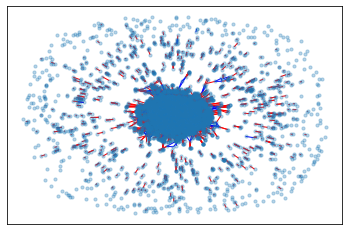

In [27]:
edge_color = []
for edge in G.edges():
    #print(edge)
    edge = G[edge[0]][edge[1]]
    if edge["type"] == "company":
        edge_color.append("b")
    if edge["type"] == "household":
        edge_color.append("r")
    

nx.draw_networkx_nodes(G,pos,node_size=10 ,alpha =0.3)
nx.draw_networkx_edges(G, pos,edge_color = edge_color)

# Adding links for pro life outside the company

In [8]:
for i, row in df_pro_contacts_adults.iterrows():
    adult_id = row.adult_id
    job_cat = row.job_cat
    pro_contacts = row.pro_contacts
    company_id = row.company_id
    
    company_employees_ids = list(df_pro_contacts_adults.loc[(df_pro_contacts_adults.company_id == company_id) &\
                                                            (df_pro_contacts_adults.adult_id != adult_id)].adult_id)

    #TO DO
        
for i, row in df_pro_contacts_children.iterrows():
    child_id = row.child_id
    school_contacts = row.school_contacts
    school_id = row.school_id
    
#     scool_pupils_ids = list(df_pro_contacts_children.loc[(df_pro_contacts_children.school_id == school_id) & (df_pro_contacts_adults.adult_id != adult_id)].adult_id)
    # TO DO

In [9]:
df_pro_contacts_adults.loc[(df_pro_contacts_adults.company_id == company_id)]

adult_id         job_cat  pro_contacts  company_id
household_id                                                    
506               1245     Shops_other             9       101.0
745               1829  Services_other           998       101.0
1844              4395     Shops_other             4       101.0
3775              6933     Shops_other            13       101.0
3801              6959  Services_other           870       101.0

In [10]:
pro_contacts

870

# Exporting the graph for visualization with Gephi

In [11]:
nx.write_gexf(G, "test.gexf")